In [1]:
# updated DSFDR with new p-values calculation (03/16/17)

In [2]:
import numpy as np
import scipy as sp
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import linalg as LA

import pickle

import transform
import statistics
import simulation
import dsfdr

%matplotlib notebook
import matplotlib.pyplot as plt
import pylab

%load_ext autoreload
%autoreload 2

## preliminary simulation

In [3]:
np.random.seed(31)

ss0 = [5, 10, 15, 20, 30, 40, 50, 100]
B = 100
sig_bh0 = []
sig_fbh0 = []
sig_ds0 = []

otu_bh0 = []
otu_fbh0 = []
otu_ds0 = []

pval_bh0 = []
pval_fbh0 = []
pval_ds0 = []

for j in ss0:
    for i in range(B):
        data0, labels0 = simulation.simulatedat(numsamples = j, numdiff=0, numc =100, numd=0)
        rej_bh0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='bhfdr')
        rej_fbh0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='filterBH')
        rej_ds0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='dsfdr')
        
        r_bh0 = np.sum(rej_bh0[0])
        sig_bh0.append(r_bh0)
        pval_bh0.append(rej_bh0[2])
        
        r_fbh0 = np.sum(rej_fbh0[0])
        sig_fbh0.append(r_fbh0)
        pval_fbh0.append(rej_fbh0[2])

        r_ds0 = np.sum(rej_ds0[0])
        sig_ds0.append(r_ds0)
        pval_ds0.append(rej_ds0[2])

    otu_bh0.append(np.mean(sig_bh0))
    otu_fbh0.append(np.mean(sig_fbh0))
    otu_ds0.append(np.mean(sig_ds0))

In [5]:
with open("simulation0_v5.pkl", "wb") as f:
    pickle.dump((ss0, otu_bh0, otu_fbh0, otu_ds0, 
                 pval_bh0, pval_fbh0, pval_ds0), f)

<IPython.core.display.Javascript object>


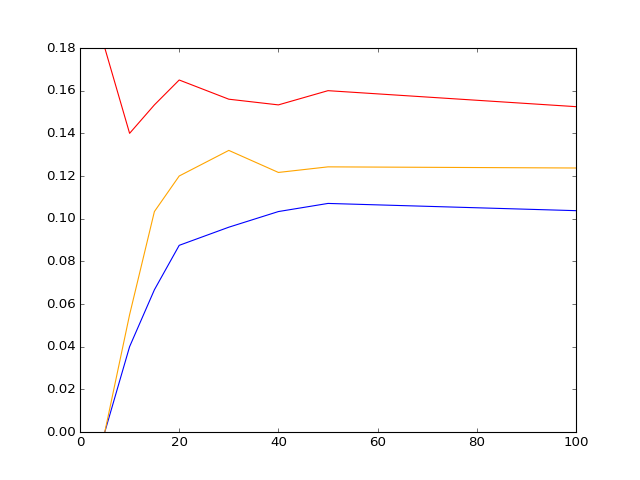

In [6]:
plt.figure()
plt.plot(ss0, otu_bh0, color = 'blue')
plt.plot(ss0, otu_fbh0, color = 'orange')
plt.plot(ss0, otu_ds0, color = 'red')

In [7]:
sample = pval_ds0[698]
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)

gap = []
for i in range(100):
    dist = x[i] - y[i]
    if dist > 0:
        gap.append(dist)
    if dist <= 0:
        gap.append(0)
norm = np.sum(gap)
print(norm)

1.11180819181


1.96344655345


<IPython.core.display.Javascript object>


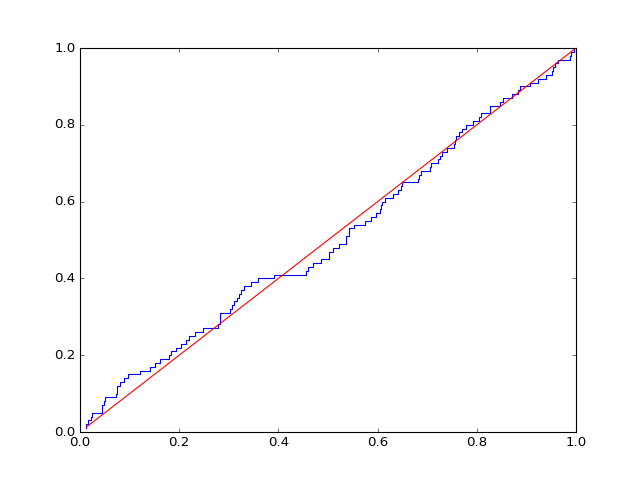

In [8]:
sample = pval_ds0[698]
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)
print(LA.norm(x - y, 1))

plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')

## simulation 1

In [9]:
np.random.seed(31)

B = 100
ss1 = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
fdr_bh1 = []
fdr_fbh1 = []
fdr_ds1 = []

sig_bh1 = []
sig_fbh1 = []
sig_ds1 = []

otu_bh1 = []
otu_fbh1 = []
otu_ds1 = []

pval_bh1 = []
pval_fbh1 = []
pval_ds1 = []

FDR_bh1 = []
FDR_fbh1 = []
FDR_ds1 = []

for j in ss1:
    for i in range(B):
        data1,labels1 = simulation.simulatedat(numsamples = j, numdiff=100, numc =100, numd=800)
        rej_bh1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='bhfdr')
        rej_fbh1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='filterBH')
        rej_ds1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='dsfdr')
        
        v_bh1 = np.sum(np.where(rej_bh1[0])[0]>=100)
        r_bh1 = np.sum(rej_bh1[0])
        sig_bh1.append(r_bh1)
        fdr_bh1.append(v_bh1/r_bh1)
        pval_bh1.append(rej_bh1[2])
        
        v_fbh1 = np.sum(np.where(rej_fbh1[0])[0]>=100)
        r_fbh1 = np.sum(rej_fbh1[0])
        sig_fbh1.append(r_fbh1)
        fdr_fbh1.append(v_fbh1/r_fbh1)
        pval_fbh1.append(rej_fbh1[2])
        
        v_ds1 = np.sum(np.where(rej_ds1[0])[0]>=100)
        r_ds1 = np.sum(rej_ds1[0])
        sig_ds1.append(r_ds1)
        fdr_ds1.append(v_ds1/r_ds1)
        pval_ds1.append(rej_ds1[2])

    print('otu...: %s' %(j))   
    otu_bh1.append(np.mean(sig_bh1))
    otu_fbh1.append(np.mean(sig_fbh1))
    otu_ds1.append(np.mean(sig_ds1))
    
    print('FDR...: %s' %(j))
    FDR_bh1.append(np.nanmean(fdr_bh1))
    FDR_fbh1.append(np.nanmean(fdr_fbh1))
    FDR_ds1.append(np.nanmean(fdr_ds1))
 

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in long_scalars


otu...: 4
FDR...: 4


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars


otu...: 5
FDR...: 5
otu...: 6
FDR...: 6
otu...: 7
FDR...: 7
otu...: 8
FDR...: 8
otu...: 9
FDR...: 9
otu...: 10
FDR...: 10
otu...: 15
FDR...: 15
otu...: 20
FDR...: 20
otu...: 30
FDR...: 30
otu...: 40
FDR...: 40
otu...: 50
FDR...: 50
otu...: 100
FDR...: 100


In [10]:
with open("simulation1_v5.pkl", "wb") as f:
    pickle.dump((ss1, otu_bh1, otu_fbh1, otu_ds1, 
                 FDR_bh1, FDR_fbh1, FDR_ds1, 
                 pval_bh1, pval_fbh1, pval_ds1), f)

<IPython.core.display.Javascript object>


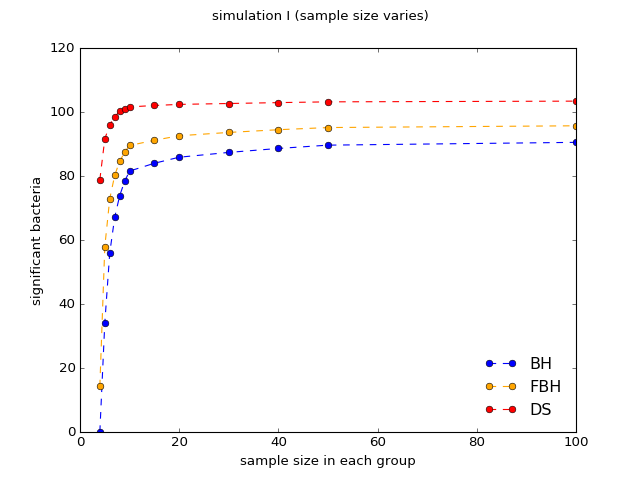

In [11]:
plt.figure()
plt.plot(ss1, otu_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1, otu_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, otu_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


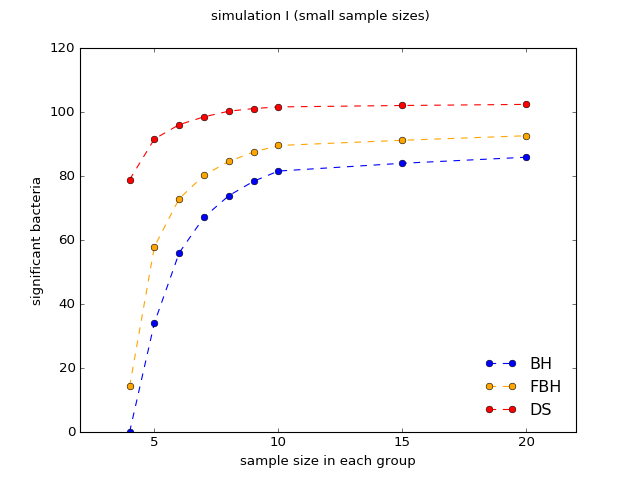

In [12]:
plt.figure()
plt.plot(ss1[0:9], otu_bh1[0:9], linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1[0:9], otu_fbh1[0:9], linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1[0:9], otu_ds1[0:9], linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.xlim([2, 22])
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (small sample sizes)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


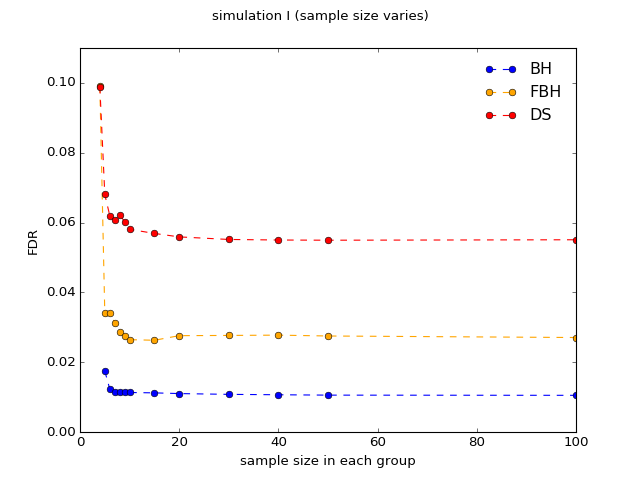

In [13]:
plt.figure()
plt.plot(ss1, FDR_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1, FDR_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, FDR_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
pylab.ylim([0, 0.11])
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('FDR')

In [14]:
# calculate L1 norms for sample size = 4, 6, 10

pval_ds1 = np.asarray(pval_ds1)
L1_4 = []
L1_6 = []
L1_10 = []

for i in range(100):
    x = pval_ds1[i, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_4.append(LA.norm(x - y, 1))

for j in np.arange(200, 300, 1):
    x = pval_ds1[j, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_6.append(LA.norm(x - y, 1))
    
for k in np.arange(600, 700, 1):
    x = pval_ds1[k, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_10.append(LA.norm(x - y, 1))   
    
print(np.mean(L1_4), np.mean(L1_6), np.mean(L1_10))

101.675241126 98.6775757354 97.0595811522


In [50]:
sample1 = pval_ds1[98]  # pvals for smaple size = 4
ecdf1 = ECDF(sample1)
x1 = np.sort(sample1)
y1 = ecdf1(x1)

sample2 = pval_ds1[298]  # pvals for smaple size = 6
ecdf2 = ECDF(sample2)
x2 = np.sort(sample2)
y2 = ecdf2(x2)

sample3 = pval_ds1[620]  # pvals for smaple size = 10
ecdf3 = ECDF(sample3)
x3 = np.sort(sample3)
y3 = ecdf3(x3)

In [51]:
print(len(x1))
print(len(x2))
print(len(x3))

1000
1000
1000


In [58]:
np.shape(pval_ds1)

(1300, 1000)

<IPython.core.display.Javascript object>


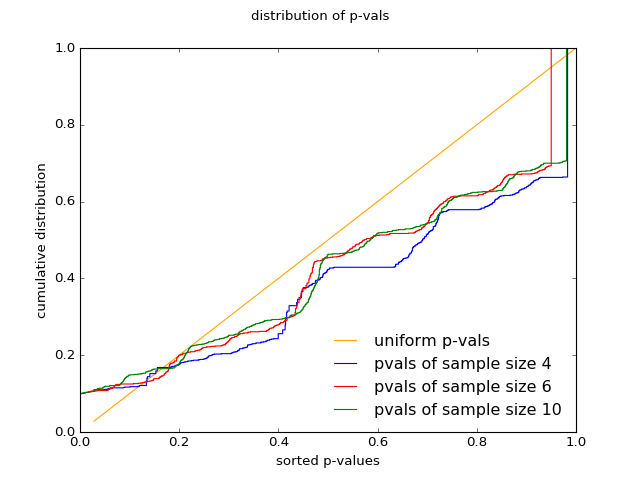

In [22]:
plt.figure()
plt.plot(x1, x1, color = 'orange', label = 'uniform p-vals')
plt.step(x1, y1, color = 'blue', label = 'pvals of sample size 4')
plt.step(x2, y2, color = 'red', label = 'pvals of sample size 6')
plt.step(x3, y3, color = 'green', label = 'pvals of sample size 10')
pylab.legend(loc ='lower right', frameon=False)
#pylab.ylim([0, 0.11])
plt.suptitle('distribution of p-vals')
plt.xlabel('sorted p-values')
plt.ylabel('cumulative distribution')

## simulation 2

In [23]:
np.random.seed(31)

B = 100
d = [400,800,2000,4000,8000,10000,15000,20000]
fdr_bh2 = []
fdr_fbh2 = []
fdr_ds2 = []

sig_bh2 = []
sig_fbh2 = []
sig_ds2 = []

otu_bh2 = []
otu_fbh2 = []
otu_ds2 = []

FDR_bh2 = []
FDR_fbh2 = []
FDR_ds2 = []

pval_bh2 = []
pval_fbh2 = []
pval_ds2 = []

for j in d:
    for i in range(B):
        data2,labels2 = simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=j)
        rej_bh2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='bhfdr')
        rej_fbh2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='filterBH')
        rej_ds2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='dsfdr')
        
        v_bh2 = np.sum(np.where(rej_bh2[0])[0]>=100)
        r_bh2 = np.sum(rej_bh2[0])
        sig_bh2.append(r_bh2)
        fdr_bh2.append(v_bh2/r_bh2)
        pval_bh2.append(rej_bh2[2])
        
        v_fbh2 = np.sum(np.where(rej_fbh2[0])[0]>=100)
        r_fbh2 = np.sum(rej_fbh2[0])
        sig_fbh2.append(r_fbh2)
        fdr_fbh2.append(v_fbh2/r_fbh2)
        pval_fbh2.append(rej_fbh2[2])
        
        v_ds2 = np.sum(np.where(rej_ds2[0])[0]>=100)
        r_ds2 = np.sum(rej_ds2[0])
        sig_ds2.append(r_ds2)
        fdr_ds2.append(v_ds2/r_ds2)
        pval_ds2.append(rej_ds2[2])
    
    print('otu...: %s' %(j)) 
    otu_bh2.append(np.mean(sig_bh2))
    otu_fbh2.append(np.mean(sig_fbh2))
    otu_ds2.append(np.mean(sig_ds2))
    
    print('FDR...: %s' %(j)) 
    FDR_bh2.append(np.nanmean(fdr_bh2))
    FDR_fbh2.append(np.nanmean(fdr_fbh2))
    FDR_ds2.append(np.nanmean(fdr_ds2))


otu...: 400
FDR...: 400
otu...: 800
FDR...: 800
otu...: 2000
FDR...: 2000
otu...: 4000
FDR...: 4000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars


otu...: 8000
FDR...: 8000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars


otu...: 10000
FDR...: 10000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in long_scalars


otu...: 15000
FDR...: 15000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in long_scalars


otu...: 20000
FDR...: 20000


In [25]:
with open("simulation2_v5.pkl", "wb") as f:
    pickle.dump((d, otu_bh2, otu_fbh2, otu_ds2, 
                 FDR_bh2, FDR_fbh2, FDR_ds2, 
                 pval_bh2, pval_fbh2, pval_ds2), f)

<IPython.core.display.Javascript object>


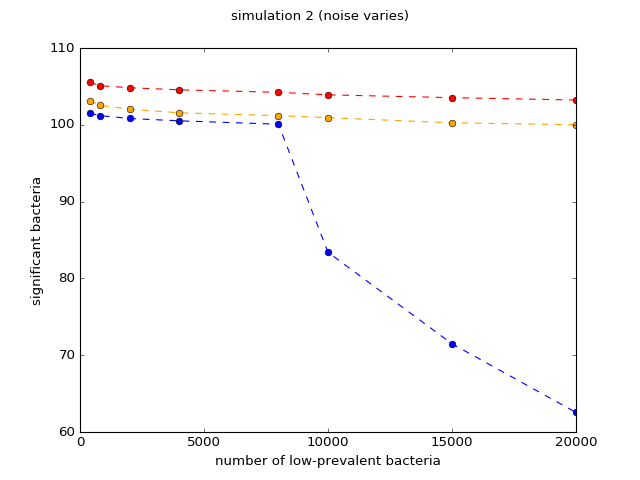

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [26]:
plt.figure()
plt.plot(d, otu_bh2, linestyle='--', marker='o', color = 'blue')
plt.plot(d, otu_fbh2, linestyle='--', marker='o', color = 'orange')
plt.plot(d, otu_ds2, linestyle='--', marker='o', color = 'red')

pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


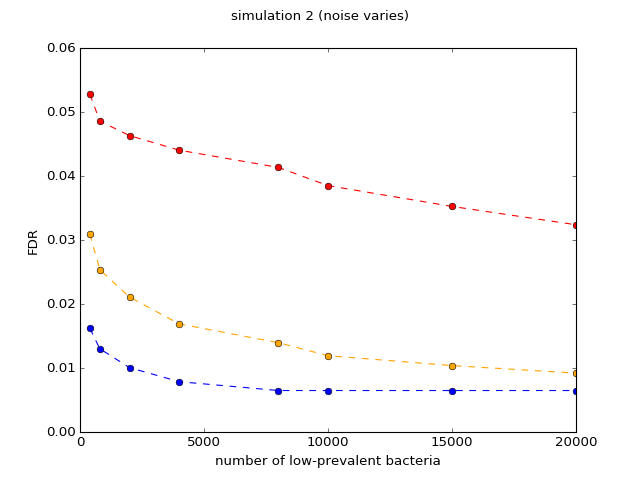

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [27]:
plt.figure()
plt.plot(d, FDR_bh2, linestyle='--', marker='o', color = 'blue')
plt.plot(d, FDR_fbh2, linestyle='--', marker='o', color = 'orange')
plt.plot(d, FDR_ds2, linestyle='--', marker='o', color = 'red')

pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('FDR')

In [65]:
sample1 = pval_ds2[398]  # pvals for d=4k
ecdf1 = ECDF(sample1)
x1 = np.sort(sample1)
y1 = ecdf1(x1)

sample2 = pval_ds2[490]  # pvals for d=8k
ecdf2 = ECDF(sample2)
x2 = np.sort(sample2)
y2 = ecdf2(x2)

sample3 = pval_ds2[578]  # pvals for d=10k
ecdf3 = ECDF(sample3)
x3 = np.sort(sample3)
y3 = ecdf3(x3)

sample4 = pval_ds2[660]  # pvals for smaple size = 15k
ecdf4 = ECDF(sample4)
x4 = np.sort(sample4)
y4 = ecdf4(x4)

sample5 = pval_ds2[770]  # pvals for smaple size = 20k
ecdf5 = ECDF(sample5)
x5 = np.sort(sample5)
y5 = ecdf5(x5)



<IPython.core.display.Javascript object>


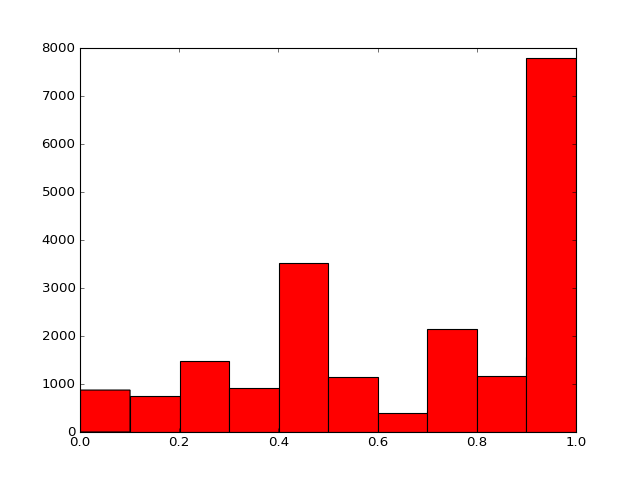

(array([  874.,   749.,  1475.,   918.,  3523.,  1152.,   397.,  2142.,
         1177.,  7793.]),
 array([  9.99000999e-04,   1.00899101e-01,   2.00799201e-01,
          3.00699301e-01,   4.00599401e-01,   5.00499500e-01,
          6.00399600e-01,   7.00299700e-01,   8.00199800e-01,
          9.00099900e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

In [69]:
plt.figure() # plot a histogram with proportion rather than frequency on the y-axis?
plt.hist(x1, color = 'blue')
plt.hist(x5, color = 'red')

<IPython.core.display.Javascript object>


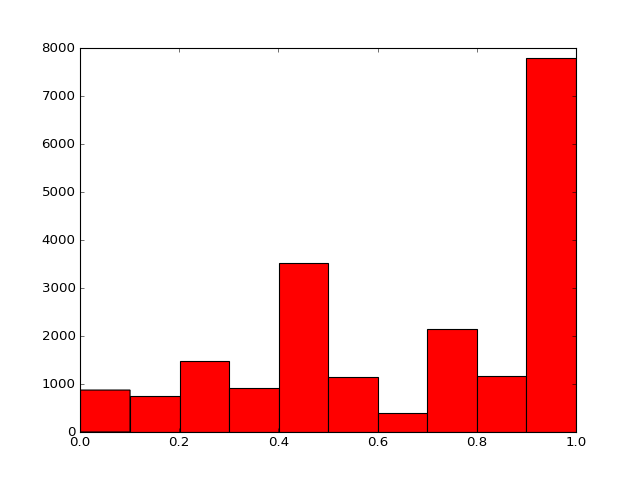

20200


In [66]:
plt.figure()
#plt.plot(x1, y1, color = 'blue', label = 'pvals of sample size 4k')
#plt.plot(x5, y5, color = 'black', label = 'pvals of sample size 20k')
#plt.hist(x1, color = 'blue')
plt.hist(x5, color = 'red')
print(len(x5))

In [62]:
2000/20200*100

9.900990099009901

<IPython.core.display.Javascript object>


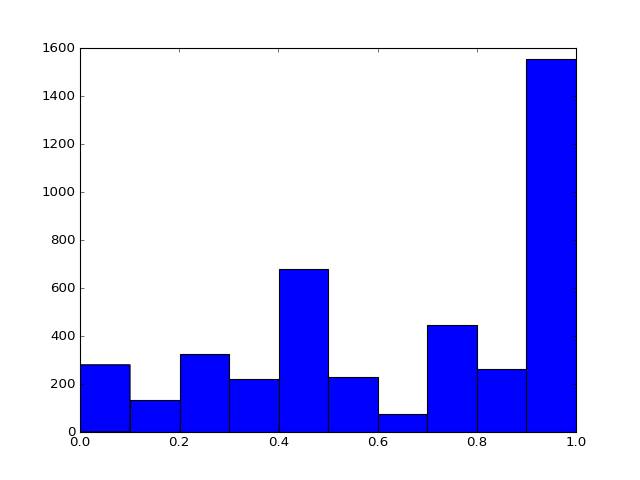

4200


In [67]:
plt.figure()
#plt.plot(x1, y1, color = 'blue', label = 'pvals of sample size 4k')
#plt.plot(x5, y5, color = 'black', label = 'pvals of sample size 20k')
plt.hist(x1, color = 'blue')
print(len(x1))

In [68]:
(300+120)/4200*100

10.0

<IPython.core.display.Javascript object>


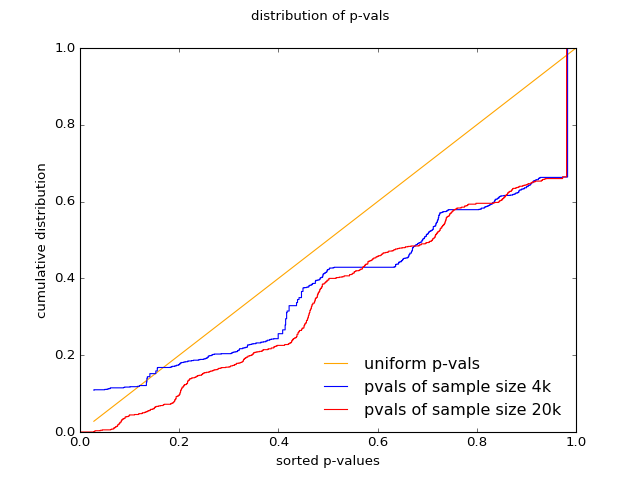

In [64]:
plt.figure()
plt.plot(x1, x1, color = 'orange', label = 'uniform p-vals')
plt.step(x1, y1, color = 'blue', label = 'pvals of sample size 4k')
#plt.step(x2, y2, color = 'red', label = 'pvals of sample size 8k')
#plt.step(x3, y3, color = 'green', label = 'pvals of sample size 10k')
#plt.step(x4, y4, color = 'purple', label = 'pvals of sample size 15k')
plt.step(x5, y5, color = 'red', label = 'pvals of sample size 20k')
pylab.legend(loc ='lower right', frameon=False)
#pylab.ylim([0, 0.11])
plt.suptitle('distribution of p-vals')
plt.xlabel('sorted p-values')
plt.ylabel('cumulative distribution')

In [56]:
len(pval_ds2)
print(len(d))

8


In [49]:
sample1 = pval_ds2[398]
x1 = np.sort(sample1)
print(len(x1))
sample5 = pval_ds2[778]  # pvals for smaple size = 20k
x5 = np.sort(sample5)
print(len(x5))
print(len(x2))
print(len(x3))


4200
20200
8200
10200


<IPython.core.display.Javascript object>


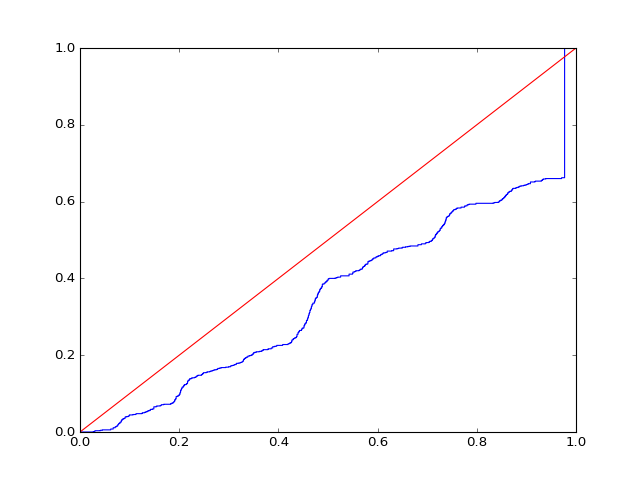

387.41976579


In [28]:
sample1 = pval_ds2[398]  # pvals for d=4k
ecdf1 = ECDF(sample1)

#x = np.linspace(min(sample), max(sample))
x1 = np.sort(sample1)
y1 = ecdf(x1)
plt.figure()
plt.step(x1, y1)
plt.plot(x1, x1, color = 'red')
print(LA.norm(x1 - y1, 1))

<IPython.core.display.Javascript object>


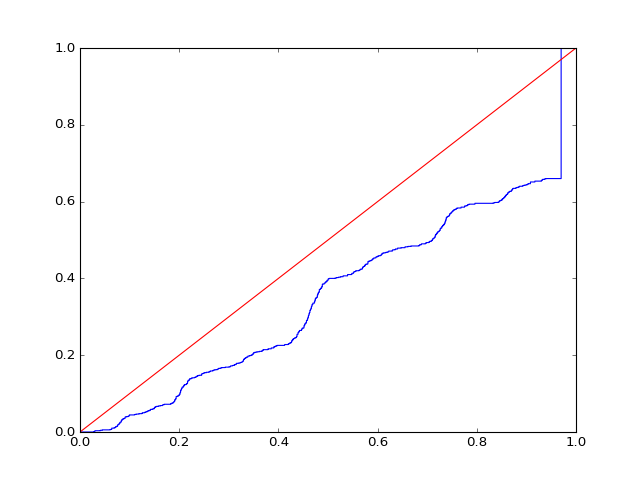

762.321305361


In [29]:
sample2 = pval_ds2[498]  # pvals for d=8k
ecdf2 = ECDF(sample2)

#x = np.linspace(min(sample), max(sample))
x2 = np.sort(sample2)
y2 = ecdf(x2)
plt.figure()
plt.step(x2, y2)
plt.plot(x2, x2, color = 'red')
print(LA.norm(x2 - y2, 1))

<IPython.core.display.Javascript object>


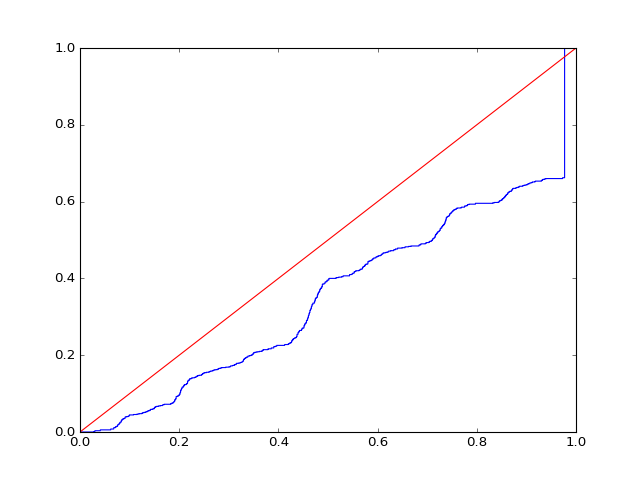

964.69983461


In [30]:
sample3 = pval_ds2[598]  # pvals for d=10k
ecdf3 = ECDF(sample3)

#x = np.linspace(min(sample), max(sample))
x3 = np.sort(sample3)
y3 = ecdf(x3)
plt.figure()
plt.step(x3, y3)
plt.plot(x3, x3, color = 'red')
print(LA.norm(x3-y3, 1))

<IPython.core.display.Javascript object>


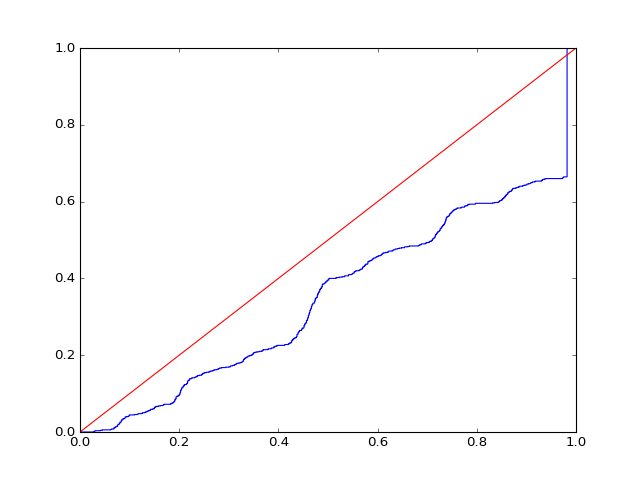

1424.25035076


In [31]:
sample4 = pval_ds2[688]  # pvals for smaple size = 15k
ecdf4 = ECDF(sample4)

#x = np.linspace(min(sample), max(sample))
x4 = np.sort(sample4)
y4 = ecdf(x4)
plt.figure()
plt.step(x4, y4)
plt.plot(x4, x4, color = 'red')
print(LA.norm(x4-y4, 1))

<IPython.core.display.Javascript object>


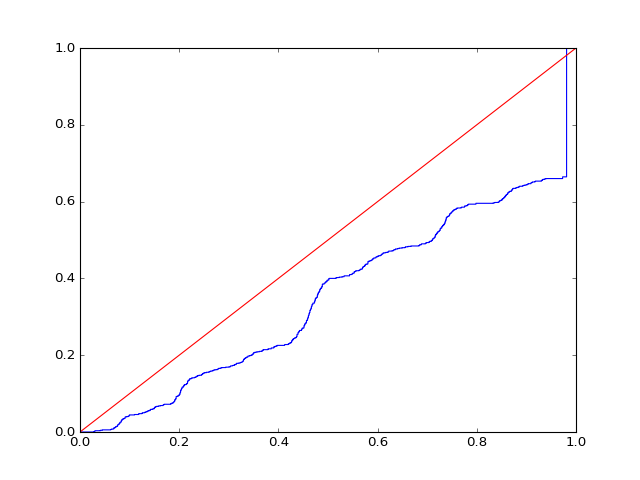

1887.26786547


In [32]:
sample5 = pval_ds2[778]  # pvals for smaple size = 20k
ecdf5 = ECDF(sample5)

#x = np.linspace(min(sample), max(sample))
x5 = np.sort(sample5)
y5 = ecdf(x5)
plt.figure()
plt.step(x5, y5)
plt.plot(x5, x5, color = 'red')
print(LA.norm(x5 - y5, 1))